# Using the `layers` module to run a simulation

The exploratory work we've done in the previous notebooks is fine, but for repeatability, we want to encapsulate our `Flow` class into a module. I've done this (and additionally made it part of a python package). This notebook walks through the steps required to use the module to run a simulation.


First, we need to import it.

In [1]:
# since we're storing the module in its own package directory
# different from the notebook directory, we have to add it to
# the path before we can import
import sys
sys.path.append('..')

import layers

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

Once it has been imported, we instantiate a `Flow` object. This contains parameters and state, and has methods to run a simulation. Parameters can be passed in as arguments, but sensible defualts are provided. If no random seed is specified, one is generated.

In [2]:
foo = layers.Flow()

All defaults are contained in the module-level constant `DEFAULTS` dictionary:

In [3]:
print(layers.DEFAULTS)

{'beta': 6e-10, 'method': 'dopri5', 'ly': 1000000.0, 'ny': 64, 'seed': None, 'w': 4e-06, 'kappa': 10.0, 'dt': 7200.0, 'initial_amp': 120000.0, 'nx': 64, 'lx': 1000000.0}


In this dictionary, `method` is the integration method, and `dt` is given in seconds.

The initialization routine also creates an `hdf5` archive for output. The filename contains the parameters `w`, `kappa`, and the random seed.

In [4]:
!ls *.h5

flow-4e-06-10.0-352905558.h5


Initial conditions are set to be a multiple of the random forcing large enough so that spin-up times are not terrible (this initial amplitude can be set with the parameter `initial_amp`).

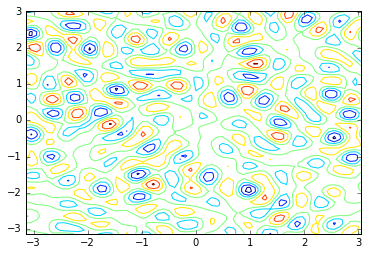

In [5]:
q = foo.h5out['q']
plt.contour(foo.xx, foo.yy, q[0,:,:])

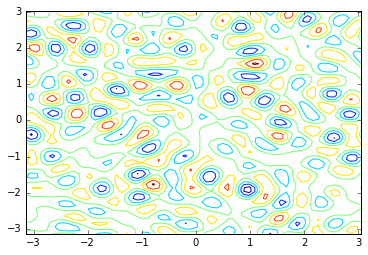

In [6]:
psi = foo.h5out['psi']
plt.contour(foo.xx, foo.yy, psi[0,:,:])

Integration is accomplished by just calling the `integrate` method. The argument is the final time, in seconds. The baseline `dt` is two hours, so a 10 hour integration looks like

In [7]:
foo.integrate(foo.dt*5)

Output gets stored in the `hdf5` archive as it's generated, so the run doesn't have to finish before you can start generating preliminary plots.

In [8]:
foo.h5out['q'].shape

(6, 64, 64)

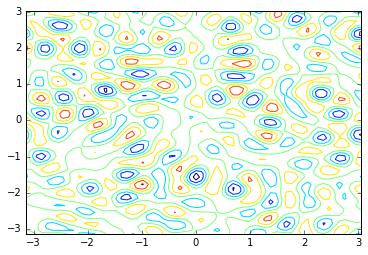

In [9]:
psi = foo.h5out['psi']
plt.contour(foo.xx, foo.yy, psi[5,:,:])

Diagonstics are contained in another module within the same package, and will be covered in another notebook.